In [1]:
import sys
sys.path.append('../..')
from backtester import matlab, backtester
from backtester.analysis import *
import pandas as pd
import numpy as np
import glob, os

import itertools

import statsmodels.tsa.stattools as ts

from backtester.exoinfo import EXOInfo
from exobuilder.data.exostorage import EXOStorage
from IPython.core.display import display, HTML

import pandas as pd
import numpy as np
import scipy
import pprint

%pylab inline
figsize(20,10)

Populating the interactive namespace from numpy and matplotlib


In [2]:
def hurst(ts):
    """Returns the Hurst Exponent of the time series vector ts"""
    # Create the range of lag values
    lags = range(2, 20)
    # Calculate the array of the variances of the lagged differences
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)
    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0

In [3]:
# Only Cont Fut Flag
only_cont_fut = False

In [4]:
# Loading global setting for MongoDB etc.
from scripts.settings import *

try:
    from scripts.settings_local import *
except:
    pass

storage = EXOStorage(MONGO_CONNSTR, MONGO_EXO_DB)
pp = pprint.PrettyPrinter(indent=4)

exo_list = storage.exo_list()
pp.pprint(exo_list)


df = pd.DataFrame()

for e in exo_list:
    exo_series, exo_dict = storage.load_series(e)
    if only_cont_fut == True:   
        if 'Fut' in exo_dict['name']:   
            exo_series = exo_series[exo_series.columns[0]]
            df[exo_dict['name']] = exo_series
            
    if only_cont_fut == False:
        exo_series = exo_series[exo_series.columns[0]]
        df[exo_dict['name']] = exo_series
#exo_series.plot()

[   'ES_BullishCollarBW',
    'ES_BearishCollarBW',
    'ES_CallSpread',
    'ES_PutSpread',
    'ES_ContFut',
    'ZS_BullishCollarBW',
    'ZS_BearishCollarBW',
    'ZS_CallSpread',
    'ZS_PutSpread',
    'ZS_ContFut',
    'CL_BullishCollarBW',
    'CL_BearishCollarBW',
    'CL_CallSpread',
    'CL_PutSpread',
    'CL_ContFut',
    'ZW_BullishCollarBW',
    'ZW_BearishCollarBW',
    'ZW_CallSpread',
    'ZW_PutSpread',
    'ZW_ContFut',
    'ZN_BullishCollarBW',
    'ZN_BearishCollarBW',
    'ZN_CallSpread',
    'ZN_PutSpread',
    'ZN_ContFut',
    'NG_BullishCollarBW',
    'NG_BearishCollarBW',
    'NG_CallSpread',
    'NG_PutSpread',
    'NG_ContFut',
    'ZC_BullishCollarBW',
    'ZC_BearishCollarBW',
    'ZC_CallSpread',
    'ZC_PutSpread',
    'ZC_ContFut',
    'CL_SMART_Ichimoku_Long',
    'ES_SMART_Ichimoku_Long',
    'NG_SMART_Ichimoku_Long',
    'ZC_SMART_Ichimoku_Long',
    'ZS_SMART_Ichimoku_Long',
    'ZW_SMART_Ichimoku_Long',
    'ZN_SMART_Ichimoku_Long',
    'CL_SMART

In [5]:
df.head()

,ES_BullishCollarBW,ES_BearishCollarBW,ES_CallSpread,ES_PutSpread,ES_ContFut,ZS_BullishCollarBW,ZS_BearishCollarBW,ZS_CallSpread,ZS_PutSpread,ZS_ContFut,...,ES_SMART_Ichimoku_Long,NG_SMART_Ichimoku_Long,ZC_SMART_Ichimoku_Long,ZS_SMART_Ichimoku_Long,ZW_SMART_Ichimoku_Long,ZN_SMART_Ichimoku_Long,CL_SMART_Ichimoku_VerticalSpread_Bullish,CL_SMART_Ichimoku_Straddle_Bullish,ES_SMART_Ichimoku_Straddle_Bullish,NG_SMART_Ichimoku_Straddle_Bullish
2011-03-01,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-02,39.272825,-14.130179,27.871356,2.632618,62.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-03,686.457895,-613.541434,604.899626,-361.312387,1187.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-04,219.643233,-323.818926,222.541720,-177.722224,462.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-05,320.430076,-456.161686,302.033420,-262.602220,650.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
px_ser = df.ES_SMART_Ichimoku_Straddle_Bullish

In [23]:
hurst_stats = pd.Series(0.0, index=px_ser.index)

window_start = 0
for i in range(0, px_ser.size, 30):
    hurst_stats.iloc[window_start : i] = hurst(px_ser.iloc[window_start : i])
    window_start = i

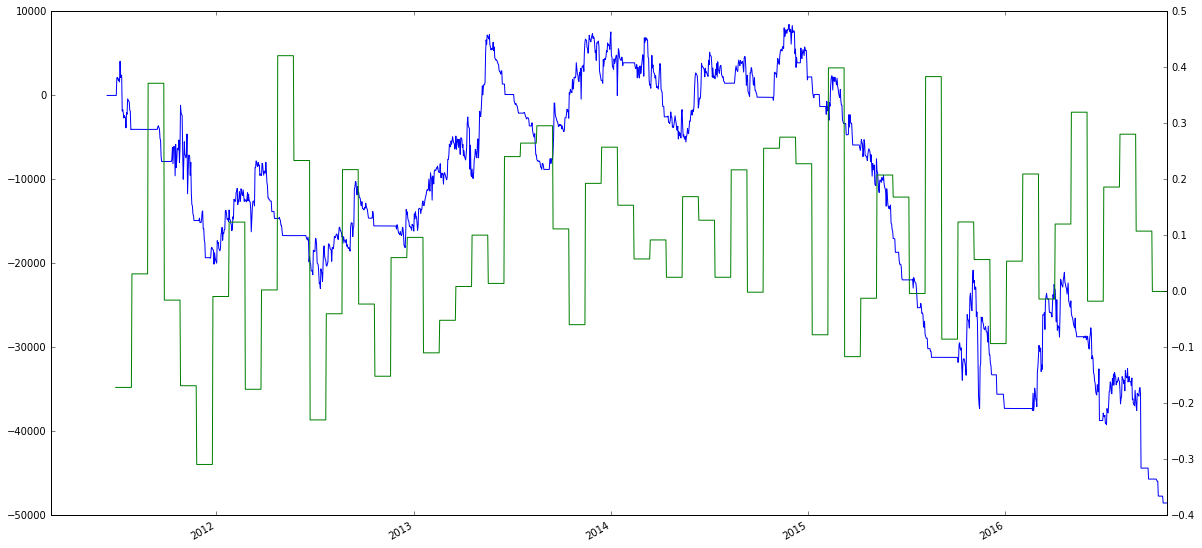

In [24]:
px_ser.dropna().plot()
hurst_stats.plot(secondary_y=True)

In [25]:
#rolling_adfteststats = px_ser.dropna().rolling(50).apply(lambda x: ts.adfuller(x)[0])
rolling_hurst = px_ser.dropna().rolling(40).apply(lambda x: hurst(x))

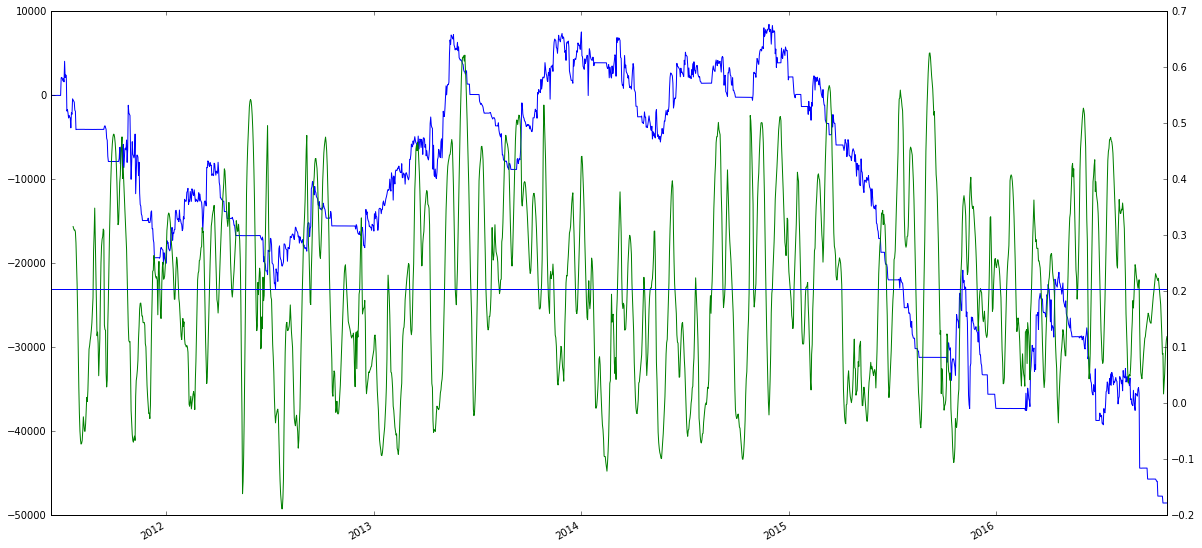

In [26]:
px_ser.dropna().ix[:'2016'].plot()
rolling_hurst.ix[:'2016'].plot(secondary_y=True)

#rolling_adfteststats.ix[:'2015'].plot(secondary_y=True)
#rstats.plot(secondary_y=True)
axhline(rolling_hurst.mean())
#axhline(-1)

In [27]:
ts.adfuller(rolling_hurst.dropna())

(-9.0599688078931617,
 4.5913219494123928e-15,
 6,
 1914,
 {'1%': -3.4337711555892523,
  '10%': -2.5675745285303582,
  '5%': -2.8630512450631986},
 -8616.5219839117435)

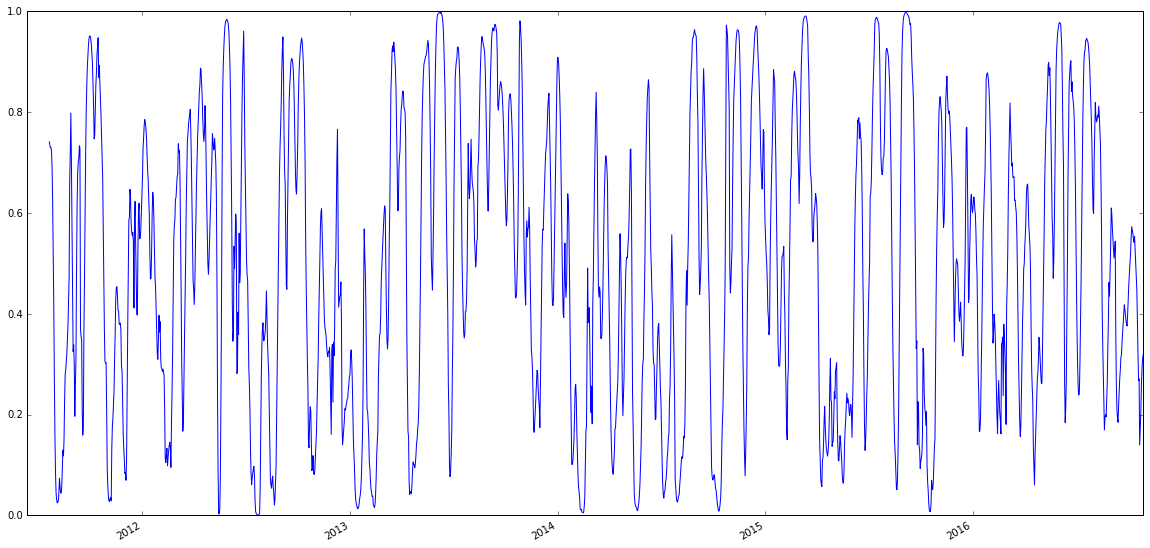

In [28]:
rolling_hurst.rank(pct=True).plot()

In [29]:
rolling_hurst_pctrank = rolling_hurst.rank(pct=True)

after_high_ser = pd.Series(0.0, index=px_ser.index, name='hurst after high pct rank value')
after_low_ser = pd.Series(0.0, index=px_ser.index, name='hurst after low pct rank value')

for i in range(px_ser.size):
    if rolling_hurst_pctrank[i] <= 0.1:
        #ser.ix[ser.index[i]: ser.index[i] + pd.DateOffset(10)] = px_ser.diff().ix[ser.index[i]: ser.index[i] + pd.DateOffset(10)]
        
        after_low_ser.ix[px_ser.index[i]: px_ser.index[i] + pd.DateOffset(10)] = px_ser.rolling(10).std().ix[px_ser.index[i]: 
                                                                                            px_ser.index[i] + pd.DateOffset(10)]
    
    
    if rolling_hurst_pctrank[i] >= 0.9:
        #ser.ix[ser.index[i]: ser.index[i] + pd.DateOffset(10)] = px_ser.diff().ix[ser.index[i]: ser.index[i] + pd.DateOffset(10)]
        
        after_high_ser.ix[px_ser.index[i]: px_ser.index[i] + pd.DateOffset(10)] = px_ser.rolling(10).std().ix[px_ser.index[i]: 
                                                                                            px_ser.index[i] + pd.DateOffset(10)]

IndexError: index out of bounds

In [ ]:
after_low_ser.dropna().plot()


after_high_ser.dropna().plot()

axhline(after_high_ser.dropna().mean())

axhline(after_low_ser.dropna().mean())

In [ ]:
#px_ser.diff().dropna().plot.kde()

px_ser.rolling(10).std().dropna().plot.kde()
#after_low_ser.dropna().plot.kde()
after_high_ser.dropna().plot.kde()

In [ ]:
px_ser.diff().dropna().plot.kde()

px_ser.diff().dropna().ix['2015-12'].plot.kde()

In [ ]:
ser.cumsum().plot()

In [ ]:
rolling_hurst_pctrank.ix[ rolling_hurst_pctrank.index[80]:
                         rolling_hurst_pctrank.index[80] + pd.DateOffset(10)]

In [ ]:
 rolling_hurst_pctrank.index[8] + pd.DateOffset(10)